In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [2]:
df_ns2=pd.read_csv('KiKNet_smoothFAS_updated_28Dec20_NS2.csv')
df_ew2=pd.read_csv('KiKNet_smoothFAS_updated_28Dec20_EW2.csv')

In [3]:
pd.set_option('display.max_columns', None)
df_ns2

,Unnamed: 0,Unnamed: 0.1,X,Code,Address,Vs30,Z1,MT_Magnitude_,MT_Depth_,rrup_0,rrup_1,rjb_0,rjb_1,rhypo_0,rhypo_1,repi_0,repi_1,depth,Origin_day_,originDate,Origin_Time_,Longitude_,Latitude_,Region_Name_,samplingFreq,lon,lat,Tectonic_Garcia_,Tectonic_Zhoa_,JMA_Depth_,Focal_mechanism_kegan_,Strike_,recordDate,station Lon,station Lat,origin Time,Number_of_Stations_,Mo_,scale Factor,Dip_,direction,Ztor_0,Ztor_1,Focal_mechanism_Garcia_,Rake_,duration Time,mag,snr_EW1,snr_NS1,snr_EW2,snr_NS2,fLow_EW1,fLow_NS1,fLow_EW2,fLow_NS2,fHigh_EW1,fHigh_NS1,fHigh_EW2,fHigh_NS2,pga_EW1,pga_NS1,pga_EW2,pga_NS2,Ia_EW1,Ia_NS1,Ia_EW2,Ia_NS2,D5_75_EW1,D5_75_NS1,D5_75_EW2,D5_75_NS2,D5_75_sorted_EW1,D5_75_sorted_NS1,D5_75_sorted_EW2,D5_75_sorted_NS2,D20_80_EW1,D20_80_NS1,D20_80_EW2,D20_80_NS2,D5_95_EW1,D5_95_NS1,D5_95_EW2,D5_95_NS2,Vs5,Vs10,Vs20,Vs800,Vs50,Vs100,station,f_0.1,f_0.106,f_0.112,f_0.118,f_0.125,f_0.132,f_0.14,f_0.148,f_0.156,f_0.165,f_0.175,f_0.185,f_0.195,f_0.206,f_0.218,f_0.231,f_0.244,f_0.258,f_0.273,f_0.289,f_0.305,f_0.323,f_0.341,f_0.361,f_0.381,f_0.403,f_0.426,f_0.451,f_0.477,f_0.504,f_0.533,f_0.563,f_0.596,f_0.63,f_0.666,f_0.704,f_0.745,f_0.787,f_0.833,f_0.88,f_0.931,f_0.984,f_1.041,f_1.1,f_1.163,f_1.23,f_1.301,f_1.375,f_1.454,f_1.538,f_1.626,f_1.719,f_1.818,f_1.922,f_2.032,f_2.149,f_2.272,f_2.402,f_2.54,f_2.686,f_2.84,f_3.003,f_3.175,f_3.357,f_3.55,f_3.753,f_3.969,f_4.196,f_4.437,f_4.691,f_4.96,f_5.245,f_5.546,f_5.864,f_6.2,f_6.556,f_6.932,f_7.329,f_7.75,f_8.194,f_8.664,f_9.161,f_9.687,f_10.242,f_10.83,f_11.451,f_12.108,f_12.802,f_13.536,f_14.313,f_15.134,f_16.002,f_16.92,f_17.89,f_18.916,f_20.001,f_21.148,f_22.361,f_23.644,f_25.0
0,0,0,397,AICH049807010222,['/19980701022200/AICH049807010222'],241.153846,300.0,5.0,8,201.373906,200.978903,201.366205,200.963052,203.238108,203.238108,203.057130,203.057130,9,1998-07-01,1998-01-07 00:00:00,02:22:47.490000,137.9307,36.6148,NORTHERN_NAGANO_PREF,200,137.930,36.620,2,2,8.57,1,354;244,1998-01-07 00:00:00,137.0568,34.9319,02:22:00,3,3.790000e+16,0.000238,71;47,2,6.708929,7.145050,0,46;153,60,4.7,0.471818,0.471818,0.132381,0.132381,0.100000,0.100000,0.100000,0.100000,100.000000,100.000000,100.000000,100.000000,0.148,0.122,1.274,0.919,4.530000e-07,3.860000e-07,0.000040,0.000032,6.290,10.455,15.670,18.755,6.290,9.580,14.515,16.720,6.895,9.055,14.035,17.205,15.845,19.395,30.665,32.665,190.000000,190.000000,212.542373,434.368748,270.258621,318.514916,AICH04,4.676220e-05,4.803216e-05,5.212308e-05,5.430639e-05,8.561749e-05,1.144337e-04,1.348883e-04,1.659167e-04,0.000164,0.000159,0.000188,0.000248,0.000339,0.000434,0.000409,0.000270,0.000303,0.000366,0.000405,0.000603,0.000785,0.000850,0.000841,0.000929,0.001149,0.001726,0.002831,0.003116,0.003107,0.003784,0.004136,0.003788,0.003995,0.003903,0.003502,0.003975,0.004892,0.004879,0.005027,0.005002,0.003605,0.003089,0.003847,0.005734,0.007732,0.007480,0.006197,0.005162,0.004489,0.003623,0.002795,0.002715,0.002667,0.002707,0.003426,0.004360,0.005080,0.004416,0.003399,0.003730,0.004008,0.003544,0.003735,0.004194,0.003611,0.002847,0.002924,0.003196,0.003011,0.002619,0.002365,0.002371,0.002518,0.002139,0.001624,0.001514,0.001455,0.001097,0.000756,0.000726,0.000800,0.000663,0.000531,0.000541,0.000536,0.000515,0.000454,0.000380,0.000333,0.000272,0.000221,0.000213,0.000228,0.000211,0.000197,0.000184,0.000151,0.000114,0.000086,0.000071
1,1,1,398,AICH059807010222,['/19980701022200/AICH059807010222'],301.324503,NaN,5.0,8,212.567233,212.181739,212.569993,212.177466,214.403284,214.403284,214.229938,214.229938,9,1998-07-01,1998-01-07 00:00:00,02:22:47.490000,137.9307,36.6148,NORTHERN_NAGANO_PREF,200,137.930,36.620,2,2,8.57,1,354;244,1998-01-07 00:00:00,136.8763,34.8886,02:22:00,3,3.790000e+16,0.000238,71;47,2,6.708929,7.145050,0,46;153,89,4.7,0.437456,0.437456,0.715524,0.715524,0.155640,0.155640,0.180054,0.180054,100.000000,100.000000,100.000000,100.000000,0.378,0.245,1.361,0.954,3.150000e-06,2.340000e-06,0.000033,0.000029,20.015,24.560,26.860,25.350,11.970,15.325,

In [4]:
df=df_ns2[['Code','station','MT_Magnitude_','rjb_0','Vs30','D5_75_NS2','D20_80_NS2','D5_95_NS2','D5_75_EW2','D20_80_EW2','D5_95_EW2']]


In [5]:
from scipy import stats
df['_5_75']=stats.gmean(df.loc[:,['D5_75_EW2','D5_75_NS2']], axis=1)
df['_20_80']=stats.gmean(df.loc[:,['D20_80_EW2','D20_80_NS2']], axis=1)
df['_5_95']=stats.gmean(df.loc[:,['D5_95_EW2','D5_95_NS2']], axis=1)

C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [6]:
df

,Code,station,MT_Magnitude_,rjb_0,Vs30,D5_75_NS2,D20_80_NS2,D5_95_NS2,D5_75_EW2,D20_80_EW2,D5_95_EW2,_5_75,_20_80,_5_95
0,AICH049807010222,AICH04,5.0,201.366205,241.153846,18.755,17.205,32.665,15.670,14.035,30.665,17.143245,15.539375,31.649206
1,AICH059807010222,AICH05,5.0,212.569993,301.324503,25.350,11.890,39.275,26.860,12.985,41.555,26.094080,12.425444,40.398919
2,AICH079807010222,AICH07,5.0,160.594546,428.100722,19.135,5.295,25.105,4.320,3.665,9.920,9.091930,4.405244,15.781052
3,AICH089807010222,AICH08,5.0,195.256405,448.533640,26.155,6.425,33.085,15.705,4.245,21.410,20.267320,5.222463,26.614843
4,AICH099807010222,AICH09,5.0,220.505360,274.027568,31.625,10.610,43.535,28.405,11.245,42.955,29.971789,10.922887,43.244028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59006,TCGH101209301441,TCGH10,3.6,48.584792,371.462264,4.490,3.750,13.260,3.460,1.760,9.290,3.941497,2.569047,11.098892
59007,TCGH111209301441,TCGH11,3.6,70.884798,328.979157,5.600,6.870,17.760,6.520,6.360,19.840,6.042516,6.610083,18.771212
59008,TCGH121209301441,TCGH12,3.6,52.028046,343.678161,4.810,5.460,15.090,5.640,6.250,18.750,5.208493,5.841661,16.820746
59009,TCGH131209301441,TCGH13,3.6,34.276865,573.596358,2.530,2.600,8.140,3.940,4.190,11.120,3.157246,3.300606,9.514032


In [7]:
df1=df.loc[(df['MT_Magnitude_'] ==7)]
print(df1['rjb_0'].max())
print(df1['rjb_0'].min())

298.634996
34.00440044


In [8]:
dur_5_75_1=df1['_5_75']
dis1=df1['rjb_0']

In [9]:
df2=pd.read_csv('borehole_data.csv')
df2.isnull().any()
df2.shape

(52251, 12)

In [10]:
df3=df2.loc[(df2['MT_Magnitude_'] ==5.5)]
dur_5_75_2=df3['_5_75']
dis2=df3['rjb_0']
print(df3['rjb_0'].max())
print(df3['rjb_0'].min())

299.4402523
1.265709274


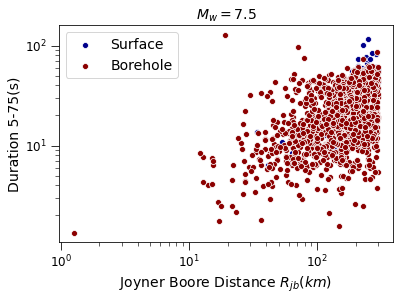

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(dis1,dur_5_75_1, color='darkblue', label='Surface')
sns.scatterplot(dis2,dur_5_75_2, color='darkred', label='Borehole')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.ylabel('Duration 5-75(s)', size=14)
plt.xlabel(r'Joyner Boore Distance $R_{jb}(km)$', size=14 )
plt.title("$M_{w}=7.5$",size=14)
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)
#plt.text(1.5,pow(10,1), "$M_{w}=3.5$", fontsize=14, color='black')

In [12]:
df1['_5_75']

30032    52.569452
30033    60.040601
30034    29.571185
30035    19.142962
30036    54.426080
           ...    
30190    32.969246
30191    33.659015
30192    27.443622
30193    20.234327
30194    24.032228
Name: _5_75, Length: 163, dtype: float64

In [13]:
df3['_5_75']

3225      5.623431
3226     19.318126
3227      4.934116
3228     22.636254
3229     13.312119
           ...    
51900    47.647080
51901    38.311366
51902    22.113272
51903    33.869219
51904    33.106521
Name: _5_75, Length: 1381, dtype: float64

In [14]:
df_sur=df[['Code','station','MT_Magnitude_','rjb_0','Vs30','_5_75','_20_80','_5_95']]
df_sur

,Code,station,MT_Magnitude_,rjb_0,Vs30,_5_75,_20_80,_5_95
0,AICH049807010222,AICH04,5.0,201.366205,241.153846,17.143245,15.539375,31.649206
1,AICH059807010222,AICH05,5.0,212.569993,301.324503,26.094080,12.425444,40.398919
2,AICH079807010222,AICH07,5.0,160.594546,428.100722,9.091930,4.405244,15.781052
3,AICH089807010222,AICH08,5.0,195.256405,448.533640,20.267320,5.222463,26.614843
4,AICH099807010222,AICH09,5.0,220.505360,274.027568,29.971789,10.922887,43.244028
...,...,...,...,...,...,...,...,...
59006,TCGH101209301441,TCGH10,3.6,48.584792,371.462264,3.941497,2.569047,11.098892
59007,TCGH111209301441,TCGH11,3.6,70.884798,328.979157,6.042516,6.610083,18.771212
59008,TCGH121209301441,TCGH12,3.6,52.028046,343.678161,5.208493,5.841661,16.820746
59009,TCGH131209301441,TCGH13,3.6,34.276865,573.596358,3.157246,3.300606,9.514032


In [15]:
df_sur = df_sur.rename(columns={'_5_75': '_5_75_s', '_20_80': '_20_80_s','_5_95':'_5_95_s'})
df_sur

,Code,station,MT_Magnitude_,rjb_0,Vs30,_5_75_s,_20_80_s,_5_95_s
0,AICH049807010222,AICH04,5.0,201.366205,241.153846,17.143245,15.539375,31.649206
1,AICH059807010222,AICH05,5.0,212.569993,301.324503,26.094080,12.425444,40.398919
2,AICH079807010222,AICH07,5.0,160.594546,428.100722,9.091930,4.405244,15.781052
3,AICH089807010222,AICH08,5.0,195.256405,448.533640,20.267320,5.222463,26.614843
4,AICH099807010222,AICH09,5.0,220.505360,274.027568,29.971789,10.922887,43.244028
...,...,...,...,...,...,...,...,...
59006,TCGH101209301441,TCGH10,3.6,48.584792,371.462264,3.941497,2.569047,11.098892
59007,TCGH111209301441,TCGH11,3.6,70.884798,328.979157,6.042516,6.610083,18.771212
59008,TCGH121209301441,TCGH12,3.6,52.028046,343.678161,5.208493,5.841661,16.820746
59009,TCGH131209301441,TCGH13,3.6,34.276865,573.596358,3.157246,3.300606,9.514032


In [16]:
df2

,Unnamed: 0,index,Code,Address,Vs30,MT_Magnitude_,rjb_0,_5_75,_20_80,_5_95,AI,CAV
0,0,0,NGNH100007010241,['/20000701024100/NGNH100007010241'],511.113918,5.0,233.487272,11.746753,11.487243,31.218909,2.199023e-07,0.005705
1,1,1,AICH040007011602,['/20000701160200/AICH040007011602'],241.153846,6.2,206.963787,35.452891,25.640738,49.814622,1.199500e-06,0.016305
2,2,2,AICH050007011602,['/20000701160200/AICH050007011602'],301.324503,6.2,221.142936,46.849679,43.009282,87.416000,1.201249e-05,0.068040
3,3,3,AICH060007011602,['/20000701160200/AICH060007011602'],219.477659,6.2,199.392397,39.518370,34.600922,78.023166,2.397082e-06,0.025368
4,4,4,AICH070007011602,['/20000701160200/AICH070007011602'],428.100722,6.2,192.195664,34.114314,34.342067,75.336970,3.963029e-06,0.034583
...,...,...,...,...,...,...,...,...,...,...,...,...
52246,57394,57394,TCGH101209301441,['/20120930144100/TCGH101209301441'],371.462264,3.6,48.584792,7.208828,6.552549,17.876188,1.073075e-06,0.011206
52247,57395,57395,TCGH111209301441,['/20120930144100/TCGH111209301441'],328.979157,3.6,70.884798,9.892219,8.955389,22.317460,2.804247e-07,0.006224
52248,57396,57396,TCGH121209301441,['/20120930144100/TCGH121209301441'],343.678161,3.6,52.028046,4.774338,5.763983,13.380583,1.880425e-06,0.013269
52249,57397,57397,TCGH131209301441,['/20120930144100/TCGH131209301441'],573.596358,3.6,34.276865,5.435550,5.467659,13.571735,1.634564e-06,0.011795


In [17]:
df_bore=df2[['Code','_5_75','_20_80','_5_95']]
df_bore = df_bore.rename(columns={'_5_75': '_5_75_b', '_20_80': '_20_80_b','_5_95':'_5_95_b'})
df_bore

,Code,_5_75_b,_20_80_b,_5_95_b
0,NGNH100007010241,11.746753,11.487243,31.218909
1,AICH040007011602,35.452891,25.640738,49.814622
2,AICH050007011602,46.849679,43.009282,87.416000
3,AICH060007011602,39.518370,34.600922,78.023166
4,AICH070007011602,34.114314,34.342067,75.336970
...,...,...,...,...
52246,TCGH101209301441,7.208828,6.552549,17.876188
52247,TCGH111209301441,9.892219,8.955389,22.317460
52248,TCGH121209301441,4.774338,5.763983,13.380583
52249,TCGH131209301441,5.435550,5.467659,13.571735


In [18]:
df_new=pd.merge(df_sur, df_bore, on='Code')

In [19]:
df_new

,Code,station,MT_Magnitude_,rjb_0,Vs30,_5_75_s,_20_80_s,_5_95_s,_5_75_b,_20_80_b,_5_95_b
0,NGNH100007010241,NGNH10,5.0,233.487272,511.113918,13.147301,12.569454,32.834035,11.746753,11.487243,31.218909
1,AICH040007011602,AICH04,6.2,206.963787,241.153846,35.671804,22.384874,48.895088,35.452891,25.640738,49.814622
2,AICH050007011602,AICH05,6.2,221.142936,301.324503,43.381661,39.527041,81.015120,46.849679,43.009282,87.416000
3,AICH060007011602,AICH06,6.2,199.392397,219.477659,28.403028,27.132093,66.023824,39.518370,34.600922,78.023166
4,AICH070007011602,AICH07,6.2,192.195664,428.100722,15.824838,7.135256,45.997477,34.114314,34.342067,75.336970
...,...,...,...,...,...,...,...,...,...,...,...
52246,TCGH101209301441,TCGH10,3.6,48.584792,371.462264,3.941497,2.569047,11.098892,7.208828,6.552549,17.876188
52247,TCGH111209301441,TCGH11,3.6,70.884798,328.979157,6.042516,6.610083,18.771212,9.892219,8.955389,22.317460
52248,TCGH121209301441,TCGH12,3.6,52.028046,343.678161,5.208493,5.841661,16.820746,4.774338,5.763983,13.380583
52249,TCGH131209301441,TCGH13,3.6,34.276865,573.596358,3.157246,3.300606,9.514032,5.435550,5.467659,13.571735


In [31]:
df_new['5_75_diff']=np.log(df_new['_5_75_s'])-np.log(df_new['_5_75_b'])
df_new['20_80_diff']=np.log(df_new['_20_80_s'])-np.log(df_new['_20_80_b'])
df_new['5_95_diff']=np.log(df_new['_5_95_s'])-np.log(df_new['_5_95_b'])


df_new

,Code,station,MT_Magnitude_,rjb_0,Vs30,_5_75_s,_20_80_s,_5_95_s,_5_75_b,_20_80_b,_5_95_b,5_75_diff,20_80_diff,5_95_diff
0,NGNH100007010241,NGNH10,5.0,233.487272,511.113918,13.147301,12.569454,32.834035,11.746753,11.487243,31.218909,0.112640,0.090032,0.050442
1,AICH040007011602,AICH04,6.2,206.963787,241.153846,35.671804,22.384874,48.895088,35.452891,25.640738,49.814622,0.006156,-0.135797,-0.018632
2,AICH050007011602,AICH05,6.2,221.142936,301.324503,43.381661,39.527041,81.015120,46.849679,43.009282,87.416000,-0.076907,-0.084431,-0.076043
3,AICH060007011602,AICH06,6.2,199.392397,219.477659,28.403028,27.132093,66.023824,39.518370,34.600922,78.023166,-0.330270,-0.243163,-0.166990
4,AICH070007011602,AICH07,6.2,192.195664,428.100722,15.824838,7.135256,45.997477,34.114314,34.342067,75.336970,-0.768136,-1.571323,-0.493384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52246,TCGH101209301441,TCGH10,3.6,48.584792,371.462264,3.941497,2.569047,11.098892,7.208828,6.552549,17.876188,-0.603746,-0.936319,-0.476624
52247,TCGH111209301441,TCGH11,3.6,70.884798,328.979157,6.042516,6.610083,18.771212,9.892219,8.955389,22.317460,-0.492928,-0.303659,-0.173045
52248,TCGH121209301441,TCGH12,3.6,52.028046,343.678161,5.208493,5.841661,16.820746,4.774338,5.763983,13.380583,0.087035,0.013386,0.228808
52249,TCGH131209301441,TCGH13,3.6,34.276865,573.596358,3.157246,3.300606,9.514032,5.435550,5.467659,13.571735,-0.543261,-0.504745,-0.355222


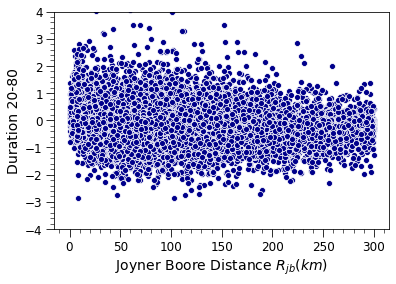

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(df_new['rjb_0'],df_new['20_80_diff'], color='darkblue')


#plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.ylabel('Duration 20-80', size=14)
plt.xlabel(r'Joyner Boore Distance $R_{jb}(km)$', size=14 )
#plt.title("$M_{w}=7.5$",size=14)
plt.ylim(-4,4)
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)
#plt.text(1.5,pow(10,1), "$M_{w}=3.5$", fontsize=14, color='black')

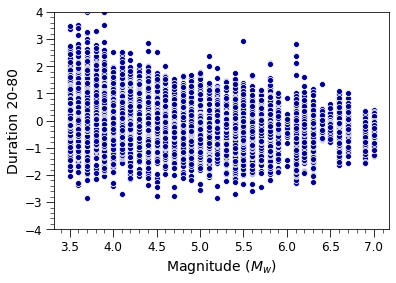

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(df_new['MT_Magnitude_'],df_new['20_80_diff'], color='darkblue')


#plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.ylabel('Duration 20-80', size=14)
plt.xlabel(r'Magnitude ($M_{w}$)', size=14 )
#plt.title("$M_{w}=7.5$",size=14)
plt.ylim(-4,4)
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)
#plt.text(1.5,pow(10,1), "$M_{w}=3.5$", fontsize=14, color='black')

In [23]:
df_new

,Code,station,MT_Magnitude_,rjb_0,Vs30,_5_75_s,_20_80_s,_5_95_s,_5_75_b,_20_80_b,_5_95_b,5_75_diff,20_80_diff,5_95_diff
0,NGNH100007010241,NGNH10,5.0,233.487272,511.113918,13.147301,12.569454,32.834035,11.746753,11.487243,31.218909,0.112640,0.090032,0.050442
1,AICH040007011602,AICH04,6.2,206.963787,241.153846,35.671804,22.384874,48.895088,35.452891,25.640738,49.814622,0.006156,-0.135797,-0.018632
2,AICH050007011602,AICH05,6.2,221.142936,301.324503,43.381661,39.527041,81.015120,46.849679,43.009282,87.416000,-0.076907,-0.084431,-0.076043
3,AICH060007011602,AICH06,6.2,199.392397,219.477659,28.403028,27.132093,66.023824,39.518370,34.600922,78.023166,-0.330270,-0.243163,-0.166990
4,AICH070007011602,AICH07,6.2,192.195664,428.100722,15.824838,7.135256,45.997477,34.114314,34.342067,75.336970,-0.768136,-1.571323,-0.493384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52246,TCGH101209301441,TCGH10,3.6,48.584792,371.462264,3.941497,2.569047,11.098892,7.208828,6.552549,17.876188,-0.603746,-0.936319,-0.476624
52247,TCGH111209301441,TCGH11,3.6,70.884798,328.979157,6.042516,6.610083,18.771212,9.892219,8.955389,22.317460,-0.492928,-0.303659,-0.173045
52248,TCGH121209301441,TCGH12,3.6,52.028046,343.678161,5.208493,5.841661,16.820746,4.774338,5.763983,13.380583,0.087035,0.013386,0.228808
52249,TCGH131209301441,TCGH13,3.6,34.276865,573.596358,3.157246,3.300606,9.514032,5.435550,5.467659,13.571735,-0.543261,-0.504745,-0.355222


In [24]:
print(len(df_new.station.unique()))

653


In [25]:
#df_new.station.unique()

In [26]:
dur_a=[]
vs30_a=[]
for i in range(653):
    a=df_new.loc[df_new['station'] == df_new.station.unique()[i], '20_80_diff'].mean()
    b=df_new.loc[df_new['station'] == df_new.station.unique()[i], 'Vs30'].mean()
    dur_a.append(a)
    vs30_a.append(b)

In [27]:
len(vs30_a)

653

In [28]:
df_new.loc[df_new['station'] == 'NGNH11', 'Vs30']

19       372.133011
59       372.133011
64       372.133011
467      372.133011
786      372.133011
            ...    
48549    372.133011
48864    372.133011
50704    372.133011
50865    372.133011
51529    372.133011
Name: Vs30, Length: 104, dtype: float64

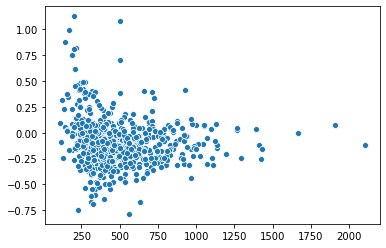

In [29]:
sns.scatterplot(vs30_a,dur_a)

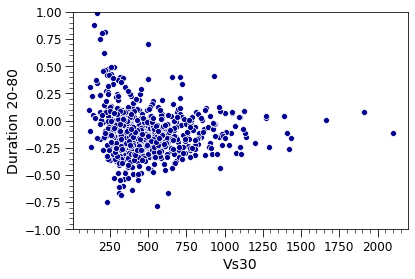

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(vs30_a,dur_a, color='darkblue')


#plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.ylabel('Duration 20-80', size=14)
plt.xlabel(r'Vs30', size=14 )
#plt.title("$M_{w}=7.5$",size=14)
plt.ylim(-1,1)
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)
#plt.text(1.5,pow(10,1), "$M_{w}=3.5$", fontsize=14, color='black')